In [9]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import tree


# Load dataset
url = "adult_PPnoFS.csv"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,38,0
6,29,3,227026,11,9,4,9,4,2,1,0,0,40,38,0
7,63,5,104626,14,15,2,9,0,4,1,3103,0,32,38,1
8,24,3,369667,15,10,4,7,4,4,0,0,0,40,38,0
9,55,3,104996,5,4,2,2,0,4,1,0,0,10,38,0


In [10]:
X = df.values[:, 0:14]
y = df.values[:,14]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred)



Accuracy is  84.6038353921 

Precision Value is
             precision    recall  f1-score   support

          0       0.87      0.93      0.90     11121
          1       0.73      0.58      0.65      3532

avg / total       0.84      0.85      0.84     14653



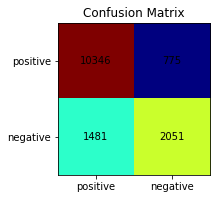

In [11]:
conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

[ 0.          0.06968798  1.        ]
[ 0.          0.58069083  1.        ]
[2 1 0]
0.755501424514


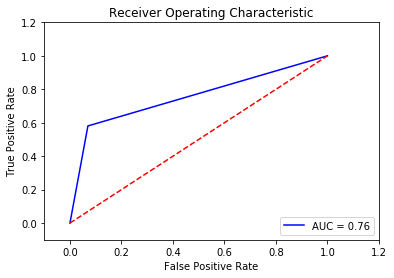

In [12]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
Gini_coefficient_gini=2*roc_auc - 1
print("Gini_coefficient is\n")
print Gini_coefficient_gini

Gini_coefficient is

0.511002849027
